In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import os 
import sys 
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.fonttype'] = 42
root_path = os.path.realpath('../')
sys.path.append(root_path)

from utils.parser import parse_alldata
from utils.analysis import print_testacc, print_ttest_acc, compute_choicemats, fit_sigmoids_to_choices, gen_choicemodelrdms, stats_fit_choicerdms,fit_model_to_subjects, arena_compute_rdms, arena_regress_rdms
from utils.plotting import disp_accuracy, disp_lcurves, disp_sigmoid_fits, disp_param_estimates, disp_choicemats, disp_rsa_param_estimates, disp_model_estimates, disp_lcurves_test,plot_arena_mds, disp_arena_coefficients


## Parameters

In [2]:
# set a few parameters 
%matplotlib inline
working_dir = os.getcwd()
data_dir = working_dir + "/../data/animals_vehicles_3_transfer_partialfb/"

domains = ['animals','vehicles']
curricula = ['blocked','interleaved']



# Data Import

In [3]:
# parse data 
try:
    with open(data_dir+"parsed/"+"animals_vehicles_both_transfertasks.pkl","rb") as f:
        alldata = pickle.load(f)
except FileNotFoundError:
    alldata = parse_alldata(data_dir+"raw/",transfertask=True, arenatask=True)
    from utils.parser import boundary_to_nan
    alldata = boundary_to_nan(alldata)
    with open(data_dir+"parsed/"+"animals_vehicles_both_transfertasks.pkl","wb") as f:
        pickle.dump(alldata,f)
    


In [4]:
import numpy as np
genders = {}
ages = []
domains = ["animals", "vehicles"]
curricula = ["blocked", "interleaved"]
for dom in domains:
    for cur in curricula:
        for age in alldata[dom][cur]["participant_age"]:
            if age == "21-30":
                age = 25
            elif age == "31-40":
                age = 35
            elif age == "18-20":
                age = 19
            else:
                age = np.nan
            ages.append(age)
        for gender in alldata[dom][cur]["participant_sex"]:
            if gender in genders:
                genders[gender] +=1
            else:
                genders[gender] = 1

print(f", n = {len(ages)}, average age: {np.nanmean(ages)}")
print(genders)


, n = 396, average age: 28.898477157360407
{'female': 259, 'male': 132, 'other': 5}


# Analysis

## Accuracy

### accuracy differences between groups at test

In [5]:
# if desired, kick out bad subjects based on training performance
import numpy as np
from copy import deepcopy
goodData = deepcopy(alldata)
doms = ["animals","vehicles"]
curricula = ["blocked","interleaved"]
for d in doms:
    for c in curricula:
        badsubs = np.nanmean(goodData[d][c]["resp_correct"][:,:400], 1) <0.50 # training auccuracy below 55 % 
        
        for k, v in goodData[d][c].items():
            goodData[d][c][k] = list(np.array(v)[badsubs==False]) if type(v)==list else v[badsubs==False]

alldata = goodData

In [255]:

print_testacc(alldata,onlygood=True, whichtask="base")
print_ttest_acc(alldata, onlygood=True, whichtask="base")
print('\n')
print_testacc(alldata,onlygood=True, whichtask="transfer")
print_ttest_acc(alldata, onlygood=True, whichtask="transfer")

** Accuracy on base task **
only good subjects (n=90): animals, blocked: 0.76
only good subjects (n=93): animals, interleaved: 0.75
only good subjects (n=93): vehicles, blocked: 0.78
only good subjects (n=88): vehicles, interleaved: 0.77
** mann whitney u on base task **
only good subjects: animals, blocked vs interleaved: t(183)= 0.412  p= 0.681
only good subjects: vehicles, blocked vs interleaved: t(183)= 0.255  p= 0.799


** Accuracy on transfer task **
only good subjects (n=90): animals, blocked: 0.56
only good subjects (n=93): animals, interleaved: 0.52
only good subjects (n=93): vehicles, blocked: 0.61
only good subjects (n=88): vehicles, interleaved: 0.59
** mann whitney u on transfer task **
only good subjects: animals, blocked vs interleaved: t(183)= 2.147  p= 0.033
only good subjects: vehicles, blocked vs interleaved: t(183)= 1.204  p= 0.230


In [52]:
# plot test accuracy
disp_accuracy(alldata,'animals',whichtask="base")
disp_accuracy(alldata,'vehicles',whichtask="base")
        
disp_accuracy(alldata,'animals',whichtask="transfer")
disp_accuracy(alldata,'vehicles',whichtask="transfer")


In [53]:
# learning curves
disp_lcurves(alldata,onlygood=True)

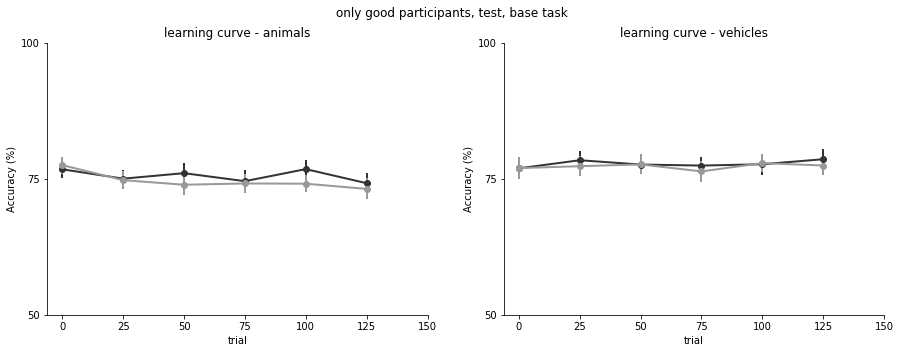

In [30]:
disp_lcurves_test(alldata,onlygood=True, whichtask="base")

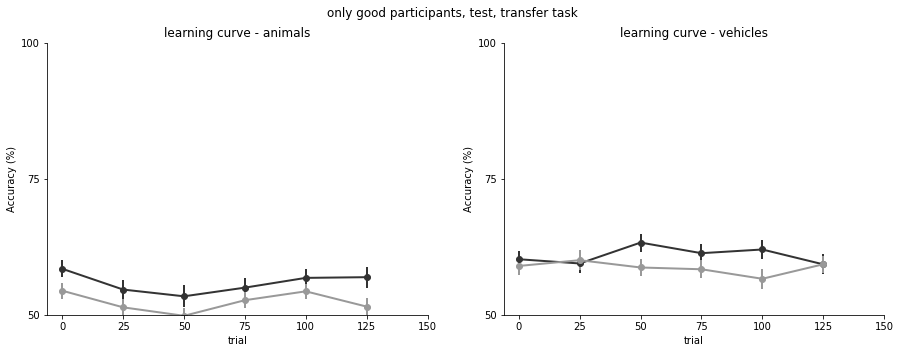

In [31]:
disp_lcurves_test(alldata,onlygood=True, whichtask="transfer")

## Choice Patterns

In [6]:
choicemats = compute_choicemats(alldata, whichtask="base")

### display sigmoids for rel and irrel dimensions 

(2, 90, 5)
(2, 93, 5)
(2, 93, 5)
(2, 88, 5)


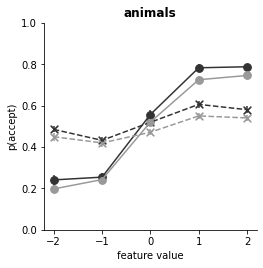

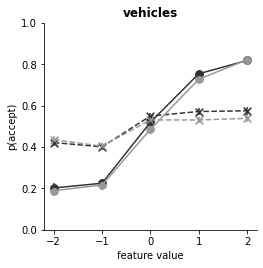

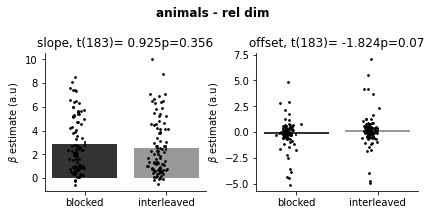

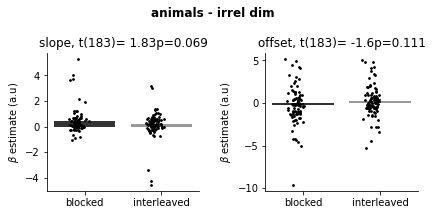

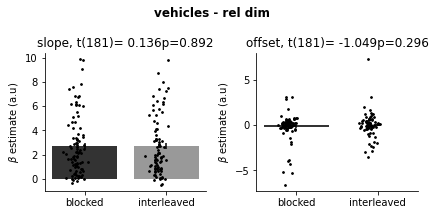

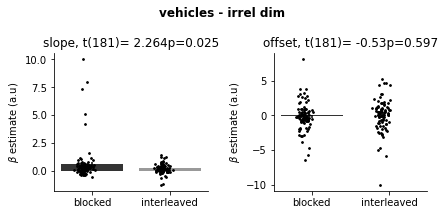

In [7]:
choicemats = compute_choicemats(alldata, whichtask="base")
betas = fit_sigmoids_to_choices(choicemats,onlygood=True, fitlapse=False)
disp_sigmoid_fits(choicemats,betas, onlygood=True)
# stats on estimated slopes
disp_param_estimates(betas,onlygood=True)

In [60]:
choicemats = compute_choicemats(alldata, whichtask="transfer")
betas = fit_sigmoids_to_choices(choicemats,onlygood=True, fitlapse=False)
disp_sigmoid_fits(choicemats,betas, onlygood=True)
# stats on estimated slopes
disp_param_estimates(betas,onlygood=True)

(2, 90, 5)
(2, 93, 5)
(2, 93, 5)
(2, 88, 5)


### display full choice matrices

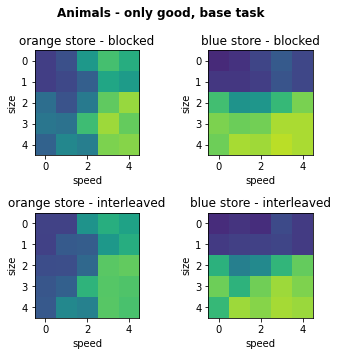

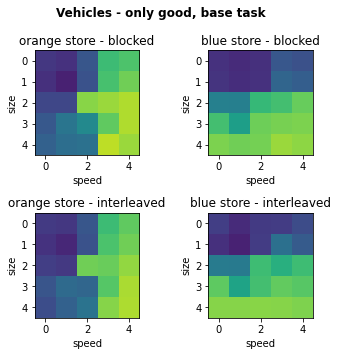

In [35]:
choicemats = compute_choicemats(alldata, whichtask="base")
disp_choicemats(choicemats,onlygood=True,whichtask="base")

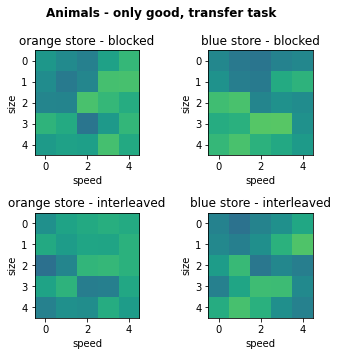

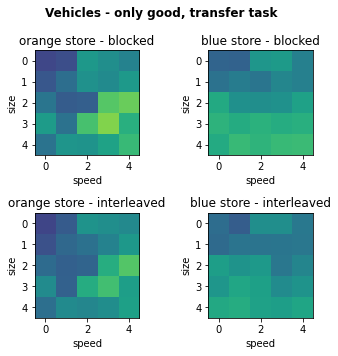

In [36]:
choicemats = compute_choicemats(alldata, whichtask="transfer")
disp_choicemats(choicemats,onlygood=True,whichtask="transfer")

## Choice Pattern RSA


In [57]:
_ = gen_choicemodelrdms(monitor=True)

(90, 1)
(90, 1)
(93, 1)
(93, 1)


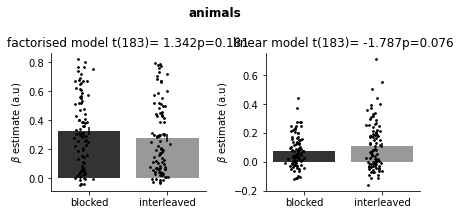

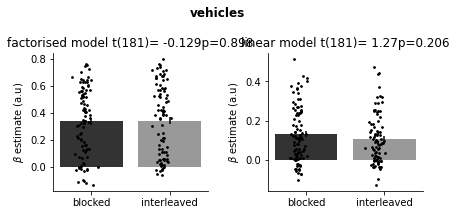

In [38]:
choicemats = compute_choicemats(alldata, whichtask="base")
betas = stats_fit_choicerdms(choicemats,onlygood=True)
disp_rsa_param_estimates(betas,onlygood=True)

animals blocked 26
animals blocked 40
animals interleaved 32
animals interleaved 75
vehicles blocked 2
vehicles blocked 85
(88, 1)
(88, 1)
(91, 1)
(91, 1)


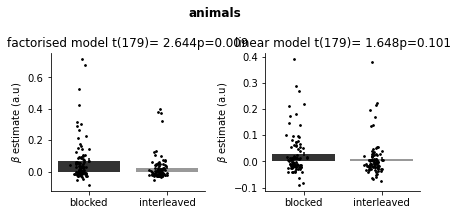

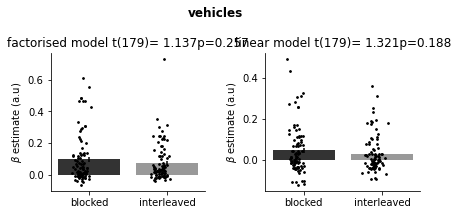

In [39]:
choicemats = compute_choicemats(alldata, whichtask="transfer")
betas = stats_fit_choicerdms(choicemats,onlygood=True)
disp_rsa_param_estimates(betas,onlygood=True)

## Choice Model


In [8]:
choicemats = compute_choicemats(alldata, whichtask="base")
thetas = fit_model_to_subjects(choicemats,onlygood=True, n_runs=50)

In [62]:
# stats on estimated slopes
disp_model_estimates(thetas)

In [63]:
choicemats = compute_choicemats(alldata, whichtask="transfer")
thetas = fit_model_to_subjects(choicemats,onlygood=True, n_runs=50)
# stats on estimated slopes
disp_model_estimates(thetas)

In [9]:
choicemats = compute_choicemats(alldata, whichtask="transfer")
thetas_transfer = fit_model_to_subjects(choicemats,onlygood=True, n_runs=50)

In [21]:
from scipy.stats import ttest_rel

domains = ["animals","vehicles"]
curricula = ["blocked","interleaved"]
for dom in domains:
    for cur in curricula:        
        lapse_base = thetas[dom][cur]["lapse"]        
        lapse_transfer = thetas_transfer[dom][cur]["lapse"]

        t,p = ttest_rel(lapse_base, lapse_transfer)
        print(f"{dom} {cur} \t t({len(lapse_base)})= {t:.3f},\t p={p:.3f}")
        


animals blocked 	 t(90)= -9.179,	 p=0.000
animals interleaved 	 t(93)= -9.975,	 p=0.000
vehicles blocked 	 t(93)= -8.900,	 p=0.000
vehicles interleaved 	 t(88)= -7.459,	 p=0.000


## Transfer of choice patterns
Why is transfer performance so low? Did participants learn and transfer the wrong rule? Regress transfer patterns against fact/lin model *and* base task patterns (either from training or test phase)

In [ ]:
#todo

## Arena task data

- build RDMs from single subject responses (25x25), separately for each trial
- mds: size/speed as scatter plot

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt
# from utils.analysis import arena_compute_rdms
rdms = arena_compute_rdms(alldata)

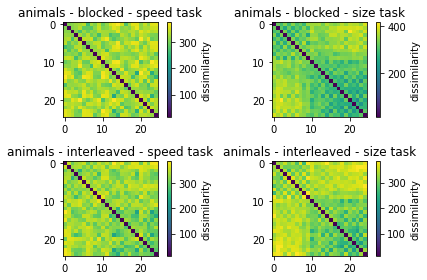

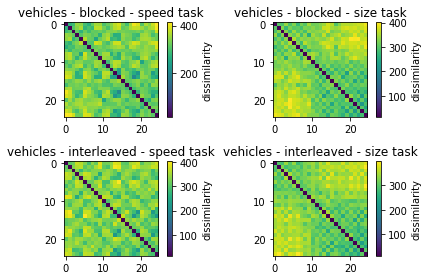

In [54]:

plt.figure()
plt.subplot(2,2,1)
plt.imshow(rdms["animals"]["blocked"][:,:2,:,:].mean(1).mean(0))
plt.title("animals - blocked - speed task")
cb = plt.colorbar()
cb.set_label("dissimilarity")

plt.subplot(2,2,2)
plt.imshow(rdms["animals"]["blocked"][:,2:,:,:].mean(1).mean(0))
plt.title("animals - blocked - size task")
cb = plt.colorbar()
cb.set_label("dissimilarity")

plt.subplot(2,2,3)
plt.imshow(rdms["animals"]["interleaved"][:,:2,:,:].mean(1).mean(0))
plt.title("animals - interleaved - speed task")
cb = plt.colorbar()
cb.set_label("dissimilarity")

plt.subplot(2,2,4)
plt.imshow(rdms["animals"]["interleaved"][:,2:,:,:].mean(1).mean(0))
plt.title("animals - interleaved - size task")
cb = plt.colorbar()
cb.set_label("dissimilarity")
plt.tight_layout()



plt.figure()
plt.subplot(2,2,1)
plt.imshow(rdms["vehicles"]["blocked"][:,:2,:,:].mean(1).mean(0))
plt.title("vehicles - blocked - speed task")
cb = plt.colorbar()
cb.set_label("dissimilarity")

plt.subplot(2,2,2)
plt.imshow(rdms["vehicles"]["blocked"][:,2:,:,:].mean(1).mean(0))
plt.title("vehicles - blocked - size task")
cb = plt.colorbar()
cb.set_label("dissimilarity")

plt.subplot(2,2,3)
plt.imshow(rdms["vehicles"]["interleaved"][:,:2,:,:].mean(1).mean(0))
plt.title("vehicles - interleaved - speed task")
cb = plt.colorbar()
cb.set_label("dissimilarity")

plt.subplot(2,2,4)
plt.imshow(rdms["vehicles"]["interleaved"][:,2:,:,:].mean(1).mean(0))
plt.title("vehicles - interleaved - size task")
cb = plt.colorbar()
cb.set_label("dissimilarity")
plt.tight_layout()



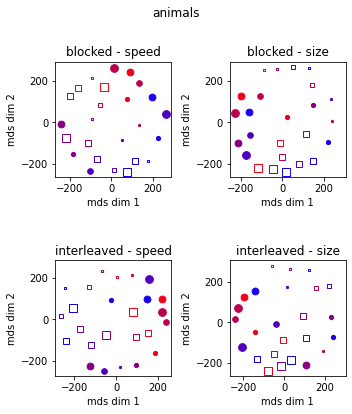

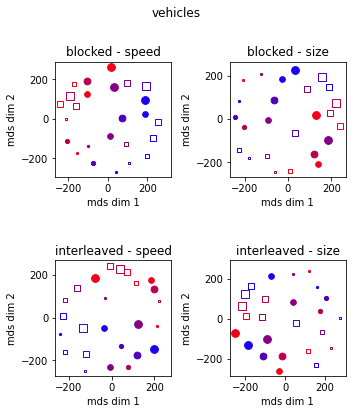

In [57]:
%matplotlib inline
plot_arena_mds(rdms, basetask="animals")
plot_arena_mds(rdms, basetask="vehicles")

In [251]:
%matplotlib qt
disp_arena_coefficients(alldata, whichtrials="base",basetask="animals")
disp_arena_coefficients(alldata, whichtrials="base",basetask="vehicles")
disp_arena_coefficients(alldata, whichtrials="transfer",basetask="animals")
disp_arena_coefficients(alldata, whichtrials="transfer",basetask="vehicles")

rel blocked vs interleaved: t(183)=2.061, p = 0.0407
rel blocked vs interleaved: t(181)=0.768, p = 0.4435
rel blocked vs interleaved: t(183)=0.671, p = 0.5029
rel blocked vs interleaved: t(181)=0.762, p = 0.4471
